(256,)
(256,)


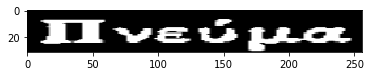

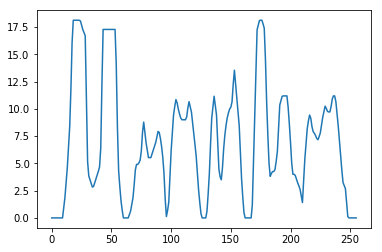

(256,)
(256,)


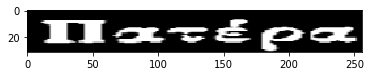

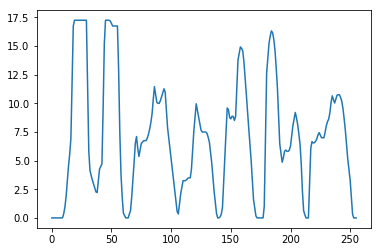

219.1137254901961
0.4087316176470588


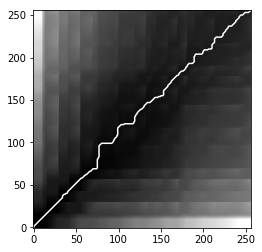

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Sat Feb 23 16:36:39 2019

@author: ainok
"""
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
import cv2

from scipy.spatial.distance import euclidean


img = cv2.imread("word/gar.png",0);
img = cv2.imread("test/0162.pdf300/1535-837-136-36.png",0);







img = cv2.bitwise_not(img)
newX=256
newY=32
img = cv2.resize(img,(int(newX),int(newY)))
img=img/255
y=img.sum(axis=0)
print(y.shape)
num=np.size(img,1)
b = np.arange(num)
print(b.shape)
plt.imshow(img, cmap='gray')
fig, ax = plt.subplots()
ax.plot(b,y)
plt.show()
plt.figure()

img2= cv2.imread("word/oti.png",0);



img2 = cv2.imread("word/gar.png",0);

img2 = cv2.imread("test/0186.pdf300/932-459-131-38.png",0);
img2= cv2.imread("test/0186.pdf300/1072-609-133-35.png",0);

img2 = cv2.imread("test/0162.pdf300/1535-837-136-36.png",0);

img2 = cv2.imread("test/0186.pdf300/932-459-131-38.png",0);








img2 = cv2.bitwise_not(img2)


img2 = cv2.resize(img2,(int(newX),int(newY)))







plt.imshow(img2, cmap='gray')


img2=img2/255
y2=img2.sum(axis=0)
print(y2.shape)
num=np.size(img2,1)
b = np.arange(num)
print(b.shape)
fig, ax = plt.subplots()
ax.plot(b,y2)
plt.show()

from fastdtw import fastdtw
distance, path = fastdtw(y, y2, dist=euclidean)
print(distance)


from dtw import dtw
euclidean_norm = lambda y, y2: np.abs(y - y2)
d, cost_matrix, acc_cost_matrix, path = dtw(y, y2, dist=euclidean_norm)
print(d)


plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.show()




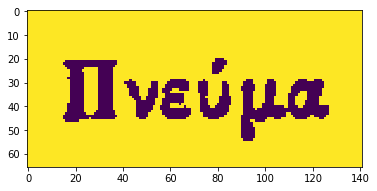

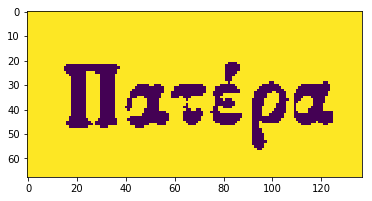

In [2]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
import cv2

def createPadding(img, margin):
    w=img.shape[1]
    #print(w)
    for i in range(10):
        img = np.insert(img, w, values=255, axis=1)

    for i in range(10):
        img = np.insert(img, 0, values=255, axis=1)    
    
    h=img.shape[0]
    #print(w)
    for i in range(10):
        img = np.insert(img, h, values=255, axis=0)
    
    for i in range(10):
        img = np.insert(img, 0, values=255, axis=0)
    
    
    return img


def applyHorizontalErosion(source_img):
    kernel = np.ones((1,9), np.uint8)
    kernel = np.ones((9,1), np.uint8)
    img_erosion = cv2.erode(source_img, kernel, iterations=1)
    return img_erosion





img = cv2.imread("test/0162.pdf300/1535-837-136-36.png",0);#pneuma
img=createPadding(img, 20)
#img=applyHorizontalErosion(img)

img2 = cv2.imread("test/0186.pdf300/932-459-131-38.png",0);#patera
img2=createPadding(img2, 20)
#img2=applyHorizontalErosion(img2)


fig=plt.figure()
#fig.text(.05,.05,results["PA"])               
plt.imshow(img)
fig=plt.figure()
#fig.text(.05,.05,results["PA"])               
plt.imshow(img2)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('test/0186.pdf300/932-459-131-38.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.imread('word/fos.png',0)
#template =applyHorizontalErosion(template )
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv2.imwrite('res.png',img_rgb)

True